<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

## Input Layer:
### Input layer is the most basic layer of a neural network that receives the external data.

## Hidden Layer:
### Hidden layer are the "inbetweeners" of input and output, they generally do not interact directly with the data. It takes a set of inputs and gives an output.

## Output Layer:
### The output layer is what the network returns in (presumably) a way to understand and interpret data in a form that attempts to solve the problem we are asking.

## Neuron:
### The most basic form of a gate in a neural network. It is synoymous with node. The behavior is similar to a neuron in the brain in that it "fires" after achieving a certain activation point.

## Weight:
### Weight is the modifier of a given node. In it's most basic form, it's a coeffecient attached to a linear variable that modifies the original value by a static one.


## Activation Function:
### Each node has an activation function, that basically turns every neuron into a binary choice: on or off. A good way to determine this is called a sigmoid function. There are many other different types of activation functions. I think of it as the closest approximation to a "yes or no" answer to a question, even if it involves a lot of nuance.


## Node Map:
### A visual diagram of the topology of the NN. A flow chart that shows the path a neuron can take between input and output. They can be simple (perceptron) or very very complex (DCIGN). 


## Perceptron:
### The most basic form of a neural network. Usually mapped as input to output, with very few or no hidden layers.

## Inputs -> Outputs
### The path a piece of data takes inside of a neural network. It goes from the raw form, to the form the network attempts to turn it into in order to solve a given problem.

## Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?
### Data is taken in from the inputs, a weight and a bias are possibly applied. In many networks they are then processed through an activation function, and then the data is reinterpeted using this data. Even using random sampling, basic neural networks seem to achieve interesting complexity and accuracy once this process is completed enough times, and then an output is given after x iterations of this, called an "epoch".

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [11]:
import pandas as pd
data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')

In [12]:
##### Your Code Here #####
import numpy as np

def nand(x1, x2):
    weights = [-1, -1]
    weighted_sum = np.dot([x1, x2], weights) +1
    if (weighted_sum < 0):
        return 0
    else:
        return 1


In [13]:
print('nand ff:', nand(0,0))
print('nand tf:', nand(1,0))
print('nand ft:', nand(0,1))
print('nand tt:', nand(1,1))

nand ff: 1
nand tf: 1
nand ft: 1
nand tt: 0


In [16]:
class Perceptron(object):
    
    def __init__(self, learning_rate, epochs=100):
        self.lr = learning_rate
        self.epochs = epochs
        
    def predict(self, row):
        # calculates weighted sum and returns activation value
        return(np.dot(row, self.weight[1:]) + self.weight[0]) >= 0
    
    def fit(self, X, y):
        # Initialize weights
        self.weight = np.array([np.random.random() for _ in range(X.shape[1] +1)])
        
        self.errors_ = []
        
        for _ in range(self.epochs):
            error = 0
            for row, label in zip(X, y):
                
                # Check current prediction against label to get error.
                # Multiply the result by learning rate
                
                adjustment = self.lr * (label - self.predict(row))
                
                # Adjust weight and bias
                self.weight[1:] += adjustment * row
                self.weight[0] += adjustment
                
                # Add up errors for each epoch
                error += adjustment != 0.0
                
            # Make list of errors per epoch
            self.errors_.append(error)
            
        return self 

In [21]:
X = np.array([np.array([0, 0]),
                 np.array([0, 1]),
                 np.array([1, 0]),
                 np.array([1, 1])
                ])
y = np.array([1, 1, 1, 0])

In [22]:
X.shape[1]

2

In [23]:
zip(X,y)

In [24]:
gate = Perceptron()

In [25]:
gate.fit(X,y)

In [26]:
gate.predict(X)

array([ True,  True,  True, False])

## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [27]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [30]:
from sklearn.preprocessing import MinMaxScaler, Normalizer

feats = list(diabetes)[:-1]
target = 'Outcome'

# introduce bias into workflow
diabetes['bias'] = np.ones(diabetes.shape[0])

# convert pandas df into split np arrays
X = diabetes[feats].to_numpy()
y = diabetes[target].to_numpy()
y = y * 2 - 1

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.23441503, 0.48333333,
        1.        ],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.11656704, 0.16666667,
        0.        ],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.25362938, 0.18333333,
        1.        ],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.07130658, 0.15      ,
        0.        ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.11571307, 0.43333333,
        1.        ],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.10119556, 0.03333333,
        0.        ]])

In [37]:
##### Update this Class #####

class Perceptron:
    
    def __init__(self, rate = 0.1, niter = 10):
        self.rate = rate
        self.niter = niter
    
    def __sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def __sigmoid_derivative(self, x):
        sx = sigmoid(x)
        return sx * (1-sx)

    def fit(self, X, y):    
        # Randomly Initialize Weights
        # assign weight of 0 for length of features + 1 (bias)
        self.weight = np.zeros(1 + X.shape[1])
        
        
        # initialize erros
        self.errors = []

        for i in range(self.niter):
            # Weighted sum of inputs / weights
            err = 0
            for xi, target in zip(X,y):
                # for loop that breaks out for each predict
                
                # the delta for each pass
                delta_w = self.rate * (target - self.predict(xi))
                # Weighted sum of inputs /weights
                self.weight[1:] += delta_w * xi
                self.weight[0] += delta_w
                err += int(delta_w != 0.0)
            self.errors.append(err)
        return self
    
    def weighted_sum(self, X):
        # calc weighted sum of neuron
        return np.dot(X, self.weight[1:]) + self.weight[0]
    
    def predict(self, X):
        # return what the class is, 0 or 1
        return np.where(self.weighted_sum(X) >= 0.0, 1, -1)

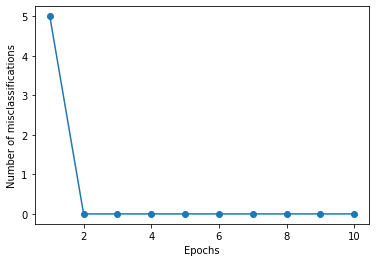

In [41]:
# initialize perceptron
import seaborn as sns
import matplotlib.pyplot as plt

nn = Perceptron()

# fit diabetes data
nn.fit(X_scaled,y)
plt.plot(range(1, len(nn.errors) + 1), nn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?